## Кодирование категориальных (факторных, номинальных) признаков

автор: Александр Дьяконов (alexanderdyakonov.wordpress.com)

In [1]:
import pandas as pd

# просто табличка для примера
def create_data():
    return (pd.DataFrame({'city': ['Moscow', 'London', 'London', 'Kiev', 'Moscow', 'Moscow', 'Kiev','Moscow'], 'degree': [1,1,2,2,3,3,1,1], 'class':['A','B','A','A','B','B','A','A'], 'income':[10.2, 11.6, 8.8, 9.0, 6.6, 10.0, 9.0, 7.2]}))

data = create_data()
data

,city,class,degree,income
0,Moscow,A,1,10.2
1,London,B,1,11.6
2,London,A,2,8.8
3,Kiev,A,2,9.0
4,Moscow,B,3,6.6
5,Moscow,B,3,10.0
6,Kiev,A,1,9.0
7,Moscow,A,1,7.2


### как часто распознают категориальные признаки

Идея - категориальные признаки те, в которых значения - строки
(можно смотреть ещё на число уникальных значений)

In [2]:
# найти все признаки, в которых первое значение - строка
def find_cat(data):
    for name in data.columns:
        s = ''
        s += name
        if (type(data[name][0]) == str):
            s += ' строка,'
        if (data[name].nunique()<=3):
            s += ' мало уникальных'
        if (s!=name):
            print (s)
            
find_cat(data)

city строка, мало уникальных
class строка, мало уникальных
degree мало уникальных


### Делаем один категориальный признак на основе нескольких

In [3]:
# конъюнкция двух признаков
def make_conj(data, feature1, feature2):
    data[feature1 + ' + ' + feature2] = data[feature1].astype(str) + ' + ' + data[feature2].astype(str)
    return (data)

# пример использования
make_conj(data, 'city', 'degree')

,city,class,degree,income,city + degree
0,Moscow,A,1,10.2,Moscow + 1
1,London,B,1,11.6,London + 1
2,London,A,2,8.8,London + 2
3,Kiev,A,2,9.0,Kiev + 2
4,Moscow,B,3,6.6,Moscow + 3
5,Moscow,B,3,10.0,Moscow + 3
6,Kiev,A,1,9.0,Kiev + 1
7,Moscow,A,1,7.2,Moscow + 1


### Обычное кодирование

По умолчанию - в лексикографическом порядке

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data.city)
data['city_le'] = le.transform(data.city)
data

,city,class,degree,income,city + degree,city_le
0,Moscow,A,1,10.2,Moscow + 1,2
1,London,B,1,11.6,London + 1,1
2,London,A,2,8.8,London + 2,1
3,Kiev,A,2,9.0,Kiev + 2,0
4,Moscow,B,3,6.6,Moscow + 3,2
5,Moscow,B,3,10.0,Moscow + 3,2
6,Kiev,A,1,9.0,Kiev + 1,0
7,Moscow,A,1,7.2,Moscow + 1,2


In [5]:
# ручная альтернатива
# словарь для кодировки
dct = {'Kiev': 0, 'London': 1, 'Moscow': 2}
data['city_le'] = data['city'].map(dct)
data

,city,class,degree,income,city + degree,city_le
0,Moscow,A,1,10.2,Moscow + 1,2
1,London,B,1,11.6,London + 1,1
2,London,A,2,8.8,London + 2,1
3,Kiev,A,2,9.0,Kiev + 2,0
4,Moscow,B,3,6.6,Moscow + 3,2
5,Moscow,B,3,10.0,Moscow + 3,2
6,Kiev,A,1,9.0,Kiev + 1,0
7,Moscow,A,1,7.2,Moscow + 1,2


### dummy-кодировка

Бинарными характеристическими векторами

In [6]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False) # sparse=False categorical_features=...
new_ohe_features = ohe.fit_transform(data.city_le.values.reshape(-1, 1))
tmp = pd.DataFrame(new_ohe_features, columns=['city=' + str(i) for i in range(new_ohe_features.shape[1])])
data = pd.concat([data, tmp], axis=1)
data

,city,class,degree,income,city + degree,city_le,city=0,city=1,city=2
0,Moscow,A,1,10.2,Moscow + 1,2,0,0,1
1,London,B,1,11.6,London + 1,1,0,1,0
2,London,A,2,8.8,London + 2,1,0,1,0
3,Kiev,A,2,9.0,Kiev + 2,0,1,0,0
4,Moscow,B,3,6.6,Moscow + 3,2,0,0,1
5,Moscow,B,3,10.0,Moscow + 3,2,0,0,1
6,Kiev,A,1,9.0,Kiev + 1,0,1,0,0
7,Moscow,A,1,7.2,Moscow + 1,2,0,0,1


In [7]:
# ручной способ
def code_myohe(data, feature):
    for i in data[feature].unique():
        data[feature + '=' + i] = (data[feature] == i).astype(float)

code_myohe(data, 'city')
data

,city,class,degree,income,city + degree,city_le,city=0,city=1,city=2,city=Moscow,city=London,city=Kiev
0,Moscow,A,1,10.2,Moscow + 1,2,0,0,1,1,0,0
1,London,B,1,11.6,London + 1,1,0,1,0,0,1,0
2,London,A,2,8.8,London + 2,1,0,1,0,0,1,0
3,Kiev,A,2,9.0,Kiev + 2,0,1,0,0,0,0,1
4,Moscow,B,3,6.6,Moscow + 3,2,0,0,1,1,0,0
5,Moscow,B,3,10.0,Moscow + 3,2,0,0,1,1,0,0
6,Kiev,A,1,9.0,Kiev + 1,0,1,0,0,0,0,1
7,Moscow,A,1,7.2,Moscow + 1,2,0,0,1,1,0,0


## Кодировка по значениям вещественного признака
Например, каждая категория - среднее значение выбранного признака

In [15]:
# функция возвращает значения нового признака
def code_mean(data, cat_feature, real_feature):
    return (data[cat_feature].map(data.groupby(cat_feature)[real_feature].mean()))

data = create_data()
data['city_mean_income'] = code_mean(data, 'city', 'income')
data

,city,class,degree,income,city_mean_income
0,Moscow,A,1,10.2,8.5
1,London,B,1,11.6,10.2
2,London,A,2,8.8,10.2
3,Kiev,A,2,9.0,9.0
4,Moscow,B,3,6.6,8.5
5,Moscow,B,3,10.0,8.5
6,Kiev,A,1,9.0,9.0
7,Moscow,A,1,7.2,8.5


## Кодировка по значениям другого категориального признака
см. *Дьяконов А. Г. Методы решения задач классификации с категориальными признаками // Прикладная математика и информатика. Труды факультета Вычислительной математики и кибернетики МГУ имени М.В. Ломоносова. — 2014. — № 46. — С. 103–127.*

In [16]:
import numpy as np
from numpy.linalg import svd

# функция возвращает значения нового признака
def code_factor(data, cat_feature, cat_feature2):
    ct = pd.crosstab(data[cat_feature], data[cat_feature2])
    u, _, _ = svd(ct.values)
    coder = dict(zip(ct.index, u[:,0])) # если кодировать первой компонентой
    return (data[cat_feature].map(coder))

data['city_degree_code'] = code_factor(data, 'city', 'degree')
data

,city,class,degree,income,city_mean_income,city_degree_code
0,Moscow,A,1,10.2,8.5,-0.888074
1,London,B,1,11.6,10.2,-0.325058
2,London,A,2,8.8,10.2,-0.325058
3,Kiev,A,2,9.0,9.0,-0.325058
4,Moscow,B,3,6.6,8.5,-0.888074
5,Moscow,B,3,10.0,8.5,-0.888074
6,Kiev,A,1,9.0,9.0,-0.325058
7,Moscow,A,1,7.2,8.5,-0.888074


## Инструменты:
### Функция crosstab

мощное средство для работы с категориальными признаками

Populating the interactive namespace from numpy and matplotlib


class          A  B
city   degree      
Kiev   1       1  0
       2       1  0
London 1       0  1
       2       1  0
Moscow 1       2  0
       3       0  2

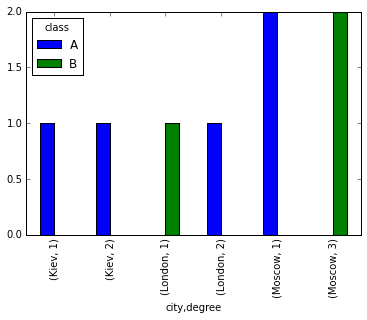

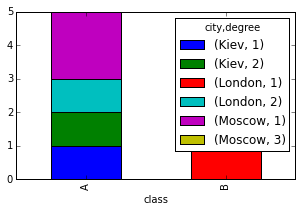

In [17]:
%pylab inline
# figsize(5, 3)
ct = pd.crosstab([data.city, data.degree], data['class'])
ct.plot(kind='bar')
ct.T.plot(kind='bar', stacked=True, figsize=(5, 3))
ct

In [18]:
# если хотим с процентами
pd.crosstab([data.city, data.degree], data['class']).apply(lambda r: r/r.sum(), axis=0)

class            A         B
city   degree               
Kiev   1       0.2  0.000000
       2       0.2  0.000000
London 1       0.0  0.333333
       2       0.2  0.000000
Moscow 1       0.4  0.000000
       3       0.0  0.666667

In [19]:
# использование нескольких функций и целевого признака
import numpy as np
pd.crosstab([data.city, data.degree], data['class'], values=data.income, aggfunc=[len, np.mean])

len     mean      
class           A   B    A     B
city   degree                   
Kiev   1        1 NaN  9.0   NaN
       2        1 NaN  9.0   NaN
London 1      NaN   1  NaN  11.6
       2        1 NaN  8.8   NaN
Moscow 1        2 NaN  8.7   NaN
       3      NaN   2  NaN   8.3

## Инструменты:
### Кодировки
Почти любая кодировка делается с помощью **map**

In [20]:
# словарь для кодировки
dct = {'A': +1, 'B':-1}
data['class'].map(dct) # data.class нельзя, т.к. зарезервированное слово

0    1
1   -1
2    1
3    1
4   -1
5   -1
6    1
7    1
Name: class, dtype: int64

In [21]:
# даже если бы не было map-функции
data['class'].apply(lambda x: dct[x])

0    1
1   -1
2    1
3    1
4   -1
5   -1
6    1
7    1
Name: class, dtype: int64

## Инструменты:
### сортировка

для просмотра таблицы
Очень коварная штука, в смысле индексации (см. data.sort(['city','degree'], inplace=True))

In [22]:
# сортировка по определённым значениям
data.sort_values(['city','degree']) # раньше - sort

,city,class,degree,income,city_mean_income,city_degree_code
6,Kiev,A,1,9.0,9.0,-0.325058
3,Kiev,A,2,9.0,9.0,-0.325058
1,London,B,1,11.6,10.2,-0.325058
2,London,A,2,8.8,10.2,-0.325058
0,Moscow,A,1,10.2,8.5,-0.888074
7,Moscow,A,1,7.2,8.5,-0.888074
4,Moscow,B,3,6.6,8.5,-0.888074
5,Moscow,B,3,10.0,8.5,-0.888074
